<a href="https://colab.research.google.com/github/ridhitaneja/TSF-GRIP/blob/main/TSF_GRIP_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP TASK 2**

Prediction using Unsupervised ML

K- Means Clustering

**BY RIDHI TANEJA**

In [1]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets

In [3]:
# loading the dataset
ir = pd.read_csv('/content/Iris.csv')
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## **ANALYSIS**

In [5]:
ir.isnull().sum()   ## checking valus are null or not

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
ir.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
ir.Species.nunique() 

3

In [8]:
ir.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


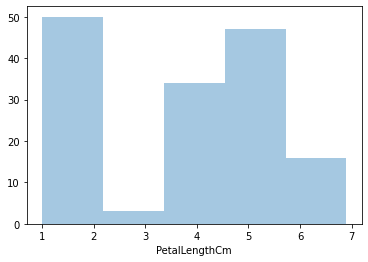

In [11]:
sns.distplot( a = ir['PetalLengthCm'] , kde=False)  # ploting petal lenghts as cm as a scale 

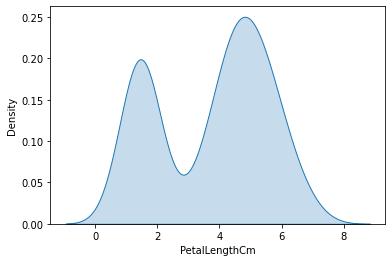

In [12]:
sns.kdeplot( data = ir['PetalLengthCm'] , shade=True)

# **Finding optimum number of cluster for k-means classification**

In [14]:
x = ir.iloc[ : , [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss  

[281831.54466666665,
 70581.3808,
 31320.711199999998,
 17762.657226173542,
 11423.238080088988,
 7909.530673076923,
 5881.448116883117,
 4562.7800793650795,
 3579.72056127451,
 2968.491432665374]

Text(0, 0.5, 'WCSS')

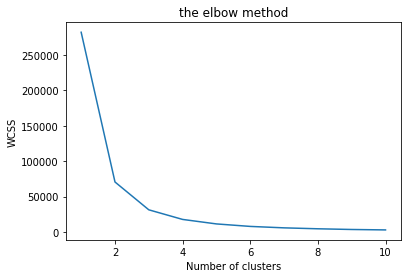

In [15]:
# ploting the result onto a line graph 

plt.plot(range(1,11), wcss)
plt.title('the elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # WITHIN CLUSTER SUM OF SQUARES 

In [16]:
# creating k-means classifiers 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

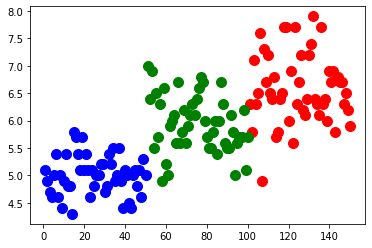

In [22]:
# visualising the cluster on first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c="red")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c="blue")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c="green")

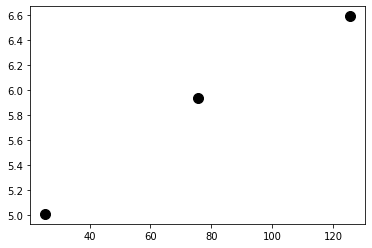

In [25]:
#ploting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="black", label = "Centroids")